In [28]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['pdf.fonttype'] = 42 # allegedly allows text to be saved as editable

mpl.rcParams['font.sans-serif'] = ['Arial Narrow']
mpl.rcParams['font.size'] = 9
mpl.rcParams['text.usetex'] = False
mpl.rcParams['svg.fonttype'] = 'none'

import warnings
warnings.filterwarnings("ignore")

print('ready')

ready


In [2]:
plt.style.use(['ggplot'])
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [3]:
df=pd.read_csv('ElginUOF.csv')
df.head(3)

,year,quarter,Total Calls for Service (CFS),Total Arrests,Total Response to Resistance (RTR) Incidents,Show of force Only,Use of force Only,Total Transitions (show to use of force),"Total show, use and transitions","Number Times Handgun Drawn, But Not Pointed",...,Officer no injuries,Officer minor injuries,Officer major injuries,Total officer injuries,Total officer incidents,Suspect no injuries,Suspect minor injuries,Suspect major injuries,Total suspect injuries,Total suspect incidents
0,2014,1st,19217,989,32,12,18,2,32,3,...,25,7,0,7,32,27,5,0,5,32
1,2014,2nd,21265,1178,25,7,15,3,25,1,...,19,6,0,6,25,18,7,0,7,25
2,2014,3rd,21994,1246,36,11,20,5,36,5,...,27,8,1,9,36,25,11,0,11,36


In [4]:
df['yearQuarter'] = df['year'].astype(str) + ', ' + df['quarter']
df.head(3)

,year,quarter,Total Calls for Service (CFS),Total Arrests,Total Response to Resistance (RTR) Incidents,Show of force Only,Use of force Only,Total Transitions (show to use of force),"Total show, use and transitions","Number Times Handgun Drawn, But Not Pointed",...,Officer minor injuries,Officer major injuries,Total officer injuries,Total officer incidents,Suspect no injuries,Suspect minor injuries,Suspect major injuries,Total suspect injuries,Total suspect incidents,yearQuarter
0,2014,1st,19217,989,32,12,18,2,32,3,...,7,0,7,32,27,5,0,5,32,"2014, 1st"
1,2014,2nd,21265,1178,25,7,15,3,25,1,...,6,0,6,25,18,7,0,7,25,"2014, 2nd"
2,2014,3rd,21994,1246,36,11,20,5,36,5,...,8,1,9,36,25,11,0,11,36,"2014, 3rd"


In [5]:
df.dtypes

year                                             int64
quarter                                         object
Total Calls for Service (CFS)                    int64
Total Arrests                                    int64
Total Response to Resistance (RTR) Incidents     int64
Show of force Only                               int64
Use of force Only                                int64
Total Transitions (show to use of force)         int64
Total show, use and transitions                  int64
Number Times Handgun Drawn, But Not Pointed      int64
Number Times Handgun Pointed                     int64
Number Times Handgun Discharged                  int64
Total handguns incidents                         int64
Number Times TASER Drawn, But Not Pointed        int64
Number Times TASER Pointed                       int64
Number Times TASER Fired                         int64
Total Taser incidents                            int64
Officer no injuries                              int64
Officer mi

In [6]:
df1 = df[['year','quarter','yearQuarter','Show of force Only']]
df1['type'] = 'SOF'
df1.rename(columns = {'Show of force Only':'Incidents'}, inplace = True)
df2 = df[['year','quarter','yearQuarter','Use of force Only']]
df2['type'] = 'UOF'
df2.rename(columns = {'Use of force Only':'Incidents'}, inplace = True)
df3 = df[['year','quarter','yearQuarter','Total Transitions (show to use of force)']]
df3['type'] = 'Transitions'
df3.rename(columns = {'Total Transitions (show to use of force)':'Incidents'}, inplace = True)
dfAll = pd.concat([df1,df2,df3])
print(dfAll.dtypes)
dfAll.head(4)

year            int64
quarter        object
yearQuarter    object
Incidents       int64
type           object
dtype: object


,year,quarter,yearQuarter,Incidents,type
0,2014,1st,"2014, 1st",12,SOF
1,2014,2nd,"2014, 2nd",7,SOF
2,2014,3rd,"2014, 3rd",11,SOF
3,2014,4th,"2014, 4th",6,SOF


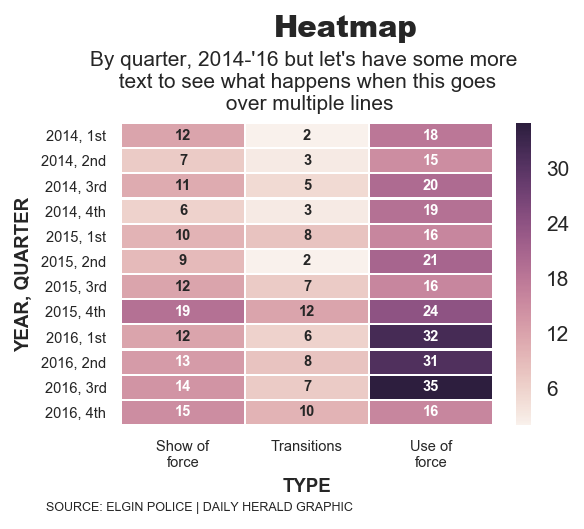

In [29]:
# bar chart with black text labels

my_dpi=150

f, ax = plt.subplots(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)

#plt.ylim(0, 40)

#ax = sns.pointplot(x='yearQuarter', y='Incidents', hue='type', data=dfAll, saturation=0.8)

# Add a legend
#ax.legend(ncol=1, loc="upper left", frameon=False)

sns.set()

# Load the example flights dataset and conver to long-form
dfpivot = dfAll.pivot("yearQuarter", "type", "Incidents")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(dfpivot, annot=True, fmt="d", linewidths=.5, annot_kws={"size": 7, 'weight':'bold'})

f.suptitle('Heatmap', fontsize=14, family='Arial Black', y=1.15)
ax.set_title('By quarter, 2014-\'16 but let\'s have some more \n text to see what happens when this goes \n over multiple lines', fontsize=10)#, loc='left')
ax.set_ylabel('YEAR, QUARTER', fontsize=9, fontweight='bold')
ax.set_xlabel('TYPE', fontsize=9, fontweight='bold')
ax.set_xticklabels(['Show of\nforce','Transitions','Use of\nforce'])


f.text(0,0-.09, 'SOURCE: ELGIN POLICE | DAILY HERALD GRAPHIC', fontsize=6)

#f.savefig('pdfs_images/heatmap.pdf')
